In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

# Experiment Utilities via `MLExperiment`

In [2]:
from mle_toolbox import MLExperiment

In [3]:
def run(mle, a):
    print(mle.train_config)
    print(mle.log)

mle = MLExperiment("configs/abc.json", train_config={"lrate": 0.01})
run(mle, a=2)

==============  configs/abc.json DOESN'T EXIST - USING DEFAULT INSTEAD  =============
DotMap(seed_id=0, lrate=0.01)


# Experiment Utilities via `@experiment()`

In [4]:
from mle_toolbox import experiment

In [5]:
@experiment("configs/abc.json", model_config={"num_layers": 2})
def run(mle, a):
    print(mle.model_config)
    print(mle.log)
    print(a)
    
run(a=2)

==============  configs/abc.json DOESN'T EXIST - USING DEFAULT INSTEAD  =============
DotMap(num_layers=2)
2


# Extending the logged statistics

If you do not provide a `log_config` either in you configuration file or as a separate input to the `@experiment` decorator, the experiment will be generated with a default set of strings to log: `what_to_track=['loss']` and `time_to_track=['num_updates']`. But you can add further statistic variables to track as follows (only before first log update!):

In [6]:
@experiment("configs/abc.json", log_config={"verbose": True})
def run(mle, a):
    print(mle.log.stats_log.time_to_track)
    print(mle.log.stats_log.what_to_track)
    mle.log.extend_tracking(["meta_loss", "ep_return"])
    print(mle.log.stats_log.what_to_track)
    mle.log.update({"num_updates": 10},
                   {"loss": 0.1, "meta_loss": 0.234, "ep_return": 10})
run(a=2)

==============  configs/abc.json DOESN'T EXIST - USING DEFAULT INSTEAD  =============


['time', 'num_updates', 'time_elapsed']
['loss']
['loss', 'meta_loss', 'ep_return']


# Combining Multiple Experiment Results

In [1]:
from mle_toolbox import combine_experiments

In [31]:
experiment_dirs = ["../tests/unit/fixtures/experiment_1",
                   "../tests/unit/fixtures/experiment_2"]
meta, hyper = combine_experiments(experiment_dirs, aggregate_seeds=False)

In [33]:
meta.keys()
#meta.experiment_1.b_1_eval_0.seed_2

odict_keys(['experiment_1', 'experiment_2'])

In [26]:
meta.experiment_2.b_1_eval_0.seed_2

DotMap(meta=DotMap(config_dict={'train_config': {'x_0': 1.0, 'noise_mean': 0.0, 'noise_std': 0.1, 't_max': 100, 'dt': 0.1}, 'log_config': {'time_to_track': ['step_counter'], 'what_to_track': ['integral', 'noise'], 'verbose': True, 'print_every_k_updates': 5, 'log_every_j_steps': 100, 'overwrite': 1}}, config_fname='experiments/pde/grid/21-09-13_b_1_eval_0/21-09-13_b_1_eval_0.json', eval_id='_b_1_eval_0', experiment_dir='experiments/pde/grid/21-09-13_b_1_eval_0/', fig_storage_paths='experiments/pde/grid/21-09-13_b_1_eval_0/figures/fig_1_seed_2.png', log_paths='experiments/pde/grid/21-09-13_b_1_eval_0/logs/log_seed_2.hdf5', model_type='no-model-type'), stats=DotMap(integral=array([0.8085457 , 0.83365476, 0.60176986, 0.7833985 , 0.5574112 ,
       0.32456774, 0.28462926, 0.13499953, 0.16833599, 0.09837009],
      dtype=float32), noise=array([ 1.1615214 , -0.42652246, -1.0992973 , -0.40010604, -1.1074387 ,
       -2.5154395 ,  0.5053649 , -1.6775653 , -0.7961814 , -0.75851154],
      dtype

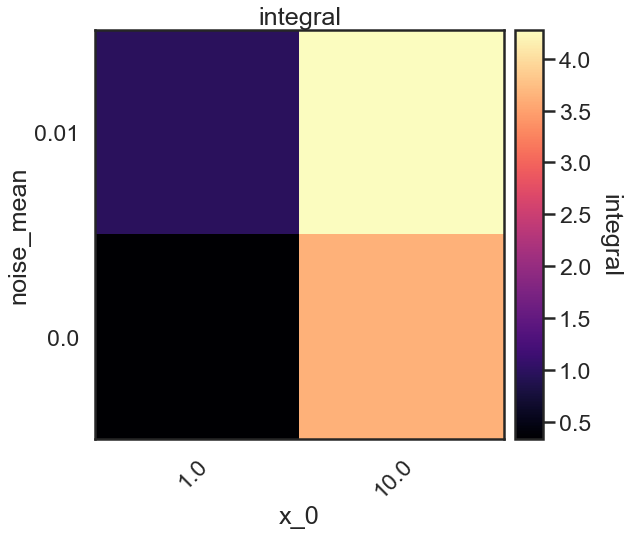

In [27]:
hyper.experiment_1.plot_2D_heat(["x_0", "noise_mean"], "integral")